In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Loading dataset
df = pd.read_csv('Visualization/OASIS/oasis_3.csv')

In [3]:
df.head()

,Subject,MR ID,id,Age,M/F,dx1,mmse,cdr,apoe,TOTAL_HIPPOCAMPUS_VOLUME,...,rhCortexVol,CortexVol,SubCortGrayVol,TotalGrayVol,SupraTentorialVol,lhCorticalWhiteMatterVol,rhCorticalWhiteMatterVol,CorticalWhiteMatterVol,L.SurfArea,R.SurfArea
0,OAS30001,OAS30001_MR_d3132,OAS30001_Freesurfer53_d3132,73.0,F,Cognitively normal,30.0,0.0,23.0,6861.9,...,178031.558882,359975.257636,48400.0,491102.257636,7.736716e+05,174372.329393,173244.012238,347616.341631,67598.1,67185.8
1,OAS30001,OAS30001_MR_d0129,OAS30001_Freesurfer53_d0129,65.0,F,Cognitively normal,30.0,0.0,23.0,7678.9,...,187528.786036,379446.180091,50687.0,517683.180091,8.105851e+05,184600.488060,182662.445419,367262.933479,70168.1,69483.8
2,OAS30001,OAS30001_MR_d2430,OAS30001_Freesurfer53_d2430,71.0,F,Cognitively normal,30.0,0.0,23.0,7105.9,...,178872.680224,357784.489639,49058.0,487405.489639,7.779313e+05,175955.968883,178172.812666,354128.781549,67905.7,68000.2
3,OAS30001,OAS30001_MR_d0757,OAS30001_Freesurfer53_d0757,67.0,F,Cognitively normal,29.0,0.0,23.0,7648.2,...,177566.874682,362040.150904,50071.0,500699.150904,7.993419e+05,185224.779932,188151.990316,373376.770247,69142.3,68558.8
4,OAS30002,OAS30002_MR_d2345,OAS30002_Freesurfer53_d2345,73.0,M,Cognitively normal,29.0,0.0,34.0,7833.2,...,230240.532783,457342.035802,56773.0,607473.035802,1.051714e+06,239168.338419,245361.377267,484529.715686,83138.1,85742.3


## Data Preprocessing

In [4]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [5]:
df = df.dropna(axis=1, how='all') # Drop any empty columns
df = df.dropna(axis=0, how='any') # Drop any rows with empty values 
df = df.rename(columns={'id':'Freesurfer ID', 'dx1':'Diagnosis', 
                        'TOTAL_HIPPOCAMPUS_VOLUME':'TotalHippocampusVol'}) # Rename columns
df = df.drop_duplicates(subset='Subject', keep='first') # Keep only the first visit; this is possible because
                                                        # df is sorted by age
df = df.reset_index(drop=True) # Reset the index
df = df.set_index('Subject')

In [6]:
cols = df.columns.tolist()
cols[2], cols[4] = cols[4], cols[2]
df = df[cols]

In [7]:
# This shows that CDR is a good value to separate dementia vs control patients
df.loc[df['cdr'] < 0.5]['Diagnosis'].value_counts()

Cognitively normal    708
No dementia             3
ProAph w/o dement       1
Name: Diagnosis, dtype: int64

In [8]:
df.loc[df['cdr'] < 0.5, 'Diagnosis'] = 'control'
df.loc[~(df['cdr'] < 0.5), 'Diagnosis'] = 'dementia'
df['Diagnosis'].unique()

array(['control', 'dementia'], dtype=object)

In [9]:
# 0 indicates control, 1 indicates dementia
df['Diagnosis'].value_counts()

control     712
dementia    310
Name: Diagnosis, dtype: int64

In [10]:
label_diagnosis = LabelEncoder()

In [11]:
df['Diagnosis'] = label_diagnosis.fit_transform(df['Diagnosis'])

<AxesSubplot:xlabel='Diagnosis', ylabel='count'>

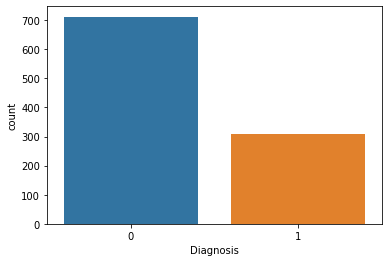

In [12]:
sns.countplot(df['Diagnosis'])

In [13]:
df.head(7)

,MR ID,Freesurfer ID,Diagnosis,M/F,Age,mmse,cdr,apoe,TotalHippocampusVol,IntraCranialVol,...,rhCortexVol,CortexVol,SubCortGrayVol,TotalGrayVol,SupraTentorialVol,lhCorticalWhiteMatterVol,rhCorticalWhiteMatterVol,CorticalWhiteMatterVol,L.SurfArea,R.SurfArea
Subject,,,,,,,,,,,,,,,,,,,,,
OAS30001,OAS30001_MR_d3132,OAS30001_Freesurfer53_d3132,0,F,73.0,30.0,0.0,23.0,6861.9,1.186091e+06,...,178031.558882,359975.257636,48400.0,491102.257636,7.736716e+05,174372.329393,173244.012238,347616.341631,67598.1,67185.8
OAS30002,OAS30002_MR_d2345,OAS30002_Freesurfer53_d2345,0,M,73.0,29.0,0.0,34.0,7833.2,1.714636e+06,...,230240.532783,457342.035802,56773.0,607473.035802,1.051714e+06,239168.338419,245361.377267,484529.715686,83138.1,85742.3
OAS30003,OAS30003_MR_d2682,OAS30003_Freesurfer53_d2682,0,F,66.0,29.0,0.0,33.0,7983.5,1.405092e+06,...,209641.219733,414466.938306,59379.0,557900.938306,9.299305e+05,213905.159729,222232.368895,436137.528624,76695.5,78697.9
OAS30004,OAS30004_MR_d2232,OAS30004_Freesurfer53_d2232,0,F,61.0,30.0,0.0,23.0,8525.1,1.443177e+06,...,206884.661369,420746.332475,53910.0,566477.332475,9.709780e+05,242595.702097,233016.992108,475612.694206,87710.1,84634.9
OAS30005,OAS30005_MR_d2377,OAS30005_Freesurfer53_d2377,0,F,54.0,30.0,0.0,33.0,9298.2,1.554566e+06,...,224311.450543,450055.106418,63545.0,611117.106418,9.867349e+05,229534.963360,230927.823126,460462.786487,82224.0,81421.3
OAS30006,OAS30006_MR_d2341,OAS30006_Freesurfer53_d2341,0,M,68.0,30.0,0.0,33.0,7634.1,1.946884e+06,...,237733.402077,472739.331515,58907.0,643328.331515,1.147571e+06,277185.190999,273057.137812,550242.328811,101915.0,99983.6
OAS30007,OAS30007_MR_d0061,OAS30007_Freesurfer53_d0061,1,M,71.0,28.0,0.5,24.0,8164.0,1.641880e+06,...,227909.170952,452008.699617,53490.0,608098.699617,9.575827e+05,206922.892386,206879.116423,413802.008808,84418.8,83142.6


In [14]:
df = df.drop(['MR ID', 'Freesurfer ID', 'M/F', 'cdr'], axis=1) # Drop categorical and redundant columns
# df = df.drop(['lhCortexVol', 'rhCortexVol', 'lhCorticalWhiteMatterVol', 'rhCorticalWhiteMatterVol', 'L.SurfArea', 'R.SurfArea'], axis=1) # Test drop to reduce dimensionality

In [15]:
df.head(7)

,Diagnosis,Age,mmse,apoe,TotalHippocampusVol,IntraCranialVol,lhCortexVol,rhCortexVol,CortexVol,SubCortGrayVol,TotalGrayVol,SupraTentorialVol,lhCorticalWhiteMatterVol,rhCorticalWhiteMatterVol,CorticalWhiteMatterVol,L.SurfArea,R.SurfArea
Subject,,,,,,,,,,,,,,,,,
OAS30001,0,73.0,30.0,23.0,6861.9,1.186091e+06,181943.698754,178031.558882,359975.257636,48400.0,491102.257636,7.736716e+05,174372.329393,173244.012238,347616.341631,67598.1,67185.8
OAS30002,0,73.0,29.0,34.0,7833.2,1.714636e+06,227101.503019,230240.532783,457342.035802,56773.0,607473.035802,1.051714e+06,239168.338419,245361.377267,484529.715686,83138.1,85742.3
OAS30003,0,66.0,29.0,33.0,7983.5,1.405092e+06,204825.718573,209641.219733,414466.938306,59379.0,557900.938306,9.299305e+05,213905.159729,222232.368895,436137.528624,76695.5,78697.9
OAS30004,0,61.0,30.0,23.0,8525.1,1.443177e+06,213861.671106,206884.661369,420746.332475,53910.0,566477.332475,9.709780e+05,242595.702097,233016.992108,475612.694206,87710.1,84634.9
OAS30005,0,54.0,30.0,33.0,9298.2,1.554566e+06,225743.655875,224311.450543,450055.106418,63545.0,611117.106418,9.867349e+05,229534.963360,230927.823126,460462.786487,82224.0,81421.3
OAS30006,0,68.0,30.0,33.0,7634.1,1.946884e+06,235005.929438,237733.402077,472739.331515,58907.0,643328.331515,1.147571e+06,277185.190999,273057.137812,550242.328811,101915.0,99983.6
OAS30007,1,71.0,28.0,24.0,8164.0,1.641880e+06,224099.528666,227909.170952,452008.699617,53490.0,608098.699617,9.575827e+05,206922.892386,206879.116423,413802.008808,84418.8,83142.6


In [16]:
# Separate the dataset into features and response variable
X = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']

In [17]:
# Splitting data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [18]:
# Applying mixmax scaling to data
"""
The purpose of this is to prevent any one column from 'overpowering' the effect
of another column due to it's values being large. It would scale the 10^6 scale
of data in the IntraCranialVol and the 10^1 scale of data in age into the same
range of data, such as between 0 and 1.
"""
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## SVM

In [19]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, recall_score, roc_curve, auc, classification_report, plot_confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

## Testing to see what kernel performs the best

### A large portion of this code is taken from a [publicly available notebook](https://www.kaggle.com/hyunseokc/detecting-early-alzheimer-s#6.C-SVM) by Hyunseok Choi.

##### This section is commented out since it takes a very long time to run and really only needs to be run once.

In [20]:
# best_score = 0

# for c_parameter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter C
#     for gamma_parameter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter gamma
#         for k_parameter in ['rbf', 'poly', 'sigmoid', 'linear']: # iterate over the values we need to try for the kernel parameter
#             n_estimators = 10
#             svmModel = BaggingClassifier(SVC(kernel=k_parameter, C=c_parameter, gamma=gamma_parameter, cache_size=7000, random_state=12), 
#                                          max_samples=1.0 / n_estimators, n_estimators=n_estimators, n_jobs=-1)
#             #svmModel = SVC(kernel=k_parameter, C=c_parameter, gamma=gamma_parameter, cache_size=7000, n_jobs=-1) #define the model
            
#             # perform cross-validation
#             scores = cross_val_score(svmModel, X_train, y_train, cv=5, scoring='accuracy')
#             # the training set will be split internally into training and cross validation

#             # compute mean cross-validation accuracy
#             score = np.mean(scores)
#             # if we got a better score, store the score and parameters
#             if score > best_score:
#                 print(f'Currently on: {c_parameter}, {gamma_parameter}, {k_parameter}')
#                 print(f'{k_parameter}: {score}')
#                 best_score = score #store the score 
#                 best_parameter_c = c_parameter #store the parameter c
#                 best_parameter_gamma = gamma_parameter #store the parameter gamma
#                 best_parameter_k = k_parameter
            

# # rebuild a model with best parameters to get score 
# SelectedSVMmodel = SVC(C=best_parameter_c, gamma=best_parameter_gamma, kernel=best_parameter_k, random_state=12).fit(X_train, y_train)

# test_score = SelectedSVMmodel.score(X_test, y_test)
# PredictedOutput = SelectedSVMmodel.predict(X_test)
# test_recall = recall_score(y_test, PredictedOutput, pos_label=1)
# fpr, tpr, thresholds = roc_curve(y_test, PredictedOutput, pos_label=1)
# test_auc = auc(fpr, tpr)
# print("Best accuracy on cross validation set is:", best_score)
# print("Best parameter for c is: ", best_parameter_c)
# print("Best parameter for gamma is: ", best_parameter_gamma)
# print("Best parameter for kernel is: ", best_parameter_k)
# print("Test accuracy with the best parameters is", test_score)
# print("Test recall with the best parameters is", test_recall)
# print("Test recall with the best parameter is", test_auc)

## Linear SVM based on the best kernel parameters found

In [21]:
SVCmodel = SVC(C=100, kernel='linear', random_state=12).fit(X_train, y_train)
score = SVCmodel.score(X_test, y_test)
print("Accuracy of Linear SVC:", score)

Accuracy of Linear SVC: 0.848780487804878


In [22]:
pred_svm = SVCmodel.predict(X_test)

In [23]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       142
           1       0.82      0.65      0.73        63

    accuracy                           0.85       205
   macro avg       0.84      0.79      0.81       205
weighted avg       0.85      0.85      0.84       205



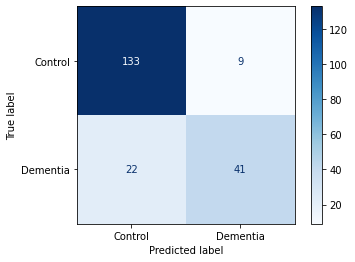

In [24]:
plot_confusion_matrix(SVCmodel, X_test, y_test, display_labels=['Control', 'Dementia'], cmap=plt.cm.Blues)